In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# import networkx as nx

In [28]:
df_BL = pd.read_csv("brendan-spotify.csv")
df_NL = pd.read_csv("nick-spotify.csv")
df_BT = pd.read_csv("btam-spotify.csv")
df_DD = pd.read_csv("danica-spotify.csv")
df_TLC = pd.read_csv("toma-spotify.csv")

print("song data read successfully!")

song data read successfully!


In [29]:
# Clean data
df_BL = df_BL.drop(columns=['added'])
df_NL = df_NL.drop(columns=['added'])
df_BT = df_BT.drop(columns=['added'])
df_DD = df_DD.drop(columns=['added'])
df_TLC = df_TLC.drop(columns=['added'])

In [35]:
def PrintCombinedPlaylist(frames, playlistLen):
    
    if(type(playlistLen) != (int)):
        return "playlist length not type int"
    
    # Concatenate all the 
    df = pd.concat(frames)
    
    # Calculate required values
    num_songs = len(df)
    means = df.mean(axis = 0, skipna = True) 
    medians = df.median(axis = 0, skipna = True)
    
    # Calculates song difference attribute for each song
    df = df.assign(delta=lambda x: 
                       abs(x['energy'] - means['energy'])
                       + abs(x['dance'] - means['dance'])
                       + abs(x['liveliness'] - means['liveliness'])
                       + abs(x['valence'] - means['valence'])
                       + abs(x['acousticness'] - means['acousticness'])
                       + abs(x['speechiness'] - means['speechiness']))
    
    return (df.sort_values(by='delta', ascending=True).head(playlistLen)[['Song', 'Artist']])
    
def Happy_vs_Sad_Playlist(frames, playlistLen, mood):
    print("yolo")

In [33]:
# Key Variables
num_songsBL = len(df_BL.index)
meansBL = df_BL.mean(axis = 0, skipna = True) 
mediansBL = df_BL.median(axis = 0, skipna = True)

num_songsNL = len(df_NL.index)
meansNL = df_NL.mean(axis = 0, skipna = True) 
mediansNL = df_NL.median(axis = 0, skipna = True)

num_songsBT = len(df_BT.index)
meansBT = df_BT.mean(axis = 0, skipna = True) 
mediansBT = df_BT.median(axis = 0, skipna = True)

num_songsDD = len(df_DD.index)
meansDD = df_DD.mean(axis = 0, skipna = True) 
mediansDD = df_DD.median(axis = 0, skipna = True)

num_songsTLC = len(df_TLC.index)
meansTLC = df_TLC.mean(axis = 0, skipna = True) 
mediansTLC = df_TLC.median(axis = 0, skipna = True)

# print("Brendan Mean statistics:\n", meansBL)
# print("\n\nNick Mean statistics:\n", meansNL)
# print("\n\nBTam Mean statistics:\n", meansBT)
# print("\n\nDanica Mean statistics:\n", meansDD)

In [39]:
PrintCombinedPlaylist([df_TLC, df_BT, df_DD, df_NL], 20)

,Song,Artist
188,Day 1 ◑,HONNE
629,2U,David Guetta
360,Ready,Alessia Cara
616,Lava,Still Woozy
778,Pageant,Cirque du Soleil
76,See You Again (feat. Kali Uchis),"Tyler, The Creator"
241,Chamber Of Reflection,Mac DeMarco
108,Chamber Of Reflection,Mac DeMarco
991,Wisemen,James Blunt
80,Dilemma,Nelly


In [19]:
# Most common songs to show up in the total dataset
frames = [df_BL, df_BT, df_DD, df_NL]
df = pd.concat(frames)
songs = df.groupby(['Song', 'Artist']).size()
songs = songs.to_frame(name='count').reset_index()
songs.sort_values(by='count', ascending=False).head(50)

genre_df = df['Genre'].value_counts()
popular_genres = genre_df.drop(genre_df[genre_df < 20].index)
print("\nAll genres occuring at least 20 times")
print(popular_genres)

# normalized data
# normalized_df=(genre_df-genre_df.mean())/genre_df.std()
normalized_df=(genre_df-genre_df.min())/(genre_df.max()-genre_df.min())


All genres occuring at least 20 times
dance pop                    496
indie pop                    199
electropop                   155
big room                     152
contemporary country         137
alternative r&b              132
pop                          102
folk-pop                      97
modern rock                   93
bedroom pop                   78
edm                           73
canadian pop                  59
baroque pop                   39
alternative dance             39
ambient worship               38
dfw rap                       37
modern alternative rock       36
australian pop                34
canadian contemporary r&b     34
atl hip hop                   33
indie folk                    30
indie poptimism               30
neo mellow                    29
bedroom soul                  29
boy band                      27
permanent wave                27
indie cafe pop                26
brostep                       26
irish singer-songwriter       26
holl

In [10]:
# Genre information
genre_df = df['Genre'].value_counts()
popular_genres = genre_df.drop(genre_df[genre_df < 15].index)
print("\nAll genres occuring at least 20 times")
print(popular_genres)

# normalized data
# normalized_df=(genre_df-genre_df.mean())/genre_df.std()
normalized_df=(genre_df-genre_df.min())/(genre_df.max()-genre_df.min())

# normalized_df.head(15)


All genres occuring at least 20 times
dance pop                    333
contemporary country         135
big room                     134
alternative r&b               65
pop                           64
electropop                    63
indie pop                     62
edm                           48
ambient worship               37
folk-pop                      36
modern rock                   35
canadian pop                  34
baroque pop                   31
dfw rap                       29
australian pop                27
hollywood                     25
alternative dance             25
brostep                       24
atl hip hop                   23
bedroom pop                   22
modern alternative rock       20
compositional ambient         20
indie cafe pop                18
canadian contemporary r&b     17
indie poptimism               16
irish singer-songwriter       16
circus                        16
hip hop                       15
melodic rap                   15
Name

<AxesSubplot:ylabel='Density'>

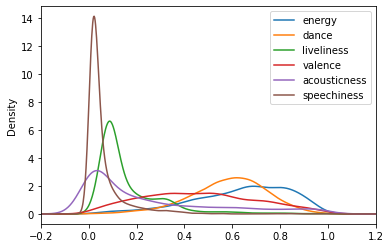

In [20]:
df_normalized = df.copy()

def normalize(x, x_max, x_min):
    return (x - x_min) / (x_max - x_min)

df_normalized['energy'] = df_normalized['energy'].apply(lambda x: normalize(x, df['energy'].max(), df['energy'].min()))
df_normalized['dance'] = df_normalized['dance'].apply(lambda x: normalize(x, df['dance'].max(), df['dance'].min()))
df_normalized['liveliness'] = df_normalized['liveliness'].apply(lambda x: normalize(x, df['liveliness'].max(),df['liveliness'].min()))
df_normalized['valence'] = df_normalized['valence'].apply(lambda x: normalize(x, df['valence'].max(),df['valence'].min()))
df_normalized['acousticness'] = df_normalized['acousticness'].apply(lambda x: normalize(x, df['acousticness'].max(), df['acousticness'].min()))
df_normalized['speechiness'] = df_normalized['speechiness'].apply(lambda x: normalize(x, df['speechiness'].max(), df['speechiness'].min()))

df_normalized.plot(y=['energy', 'dance','liveliness', 'valence', 'acousticness','speechiness'],kind='density', xlim=[-0.2,1.2])
# df_normalized.plot(y=['energy', 'dance','liveliness', 'speechiness'],kind='density')



In [24]:
# Spotify defined "Happiest" songs

df.sort_values(by='valence', ascending=False).head(25)

,Song,Artist,Genre,Year,bpm,energy,dance,dB,liveliness,valence,duration,acousticness,speechiness,popularity
19,Pumped Up Kicks,Foster The People,indie pop,2011,128,71,73,-6,10,97,240,14,3,86
46,There's Nothing Holdin' Me Back,Shawn Mendes,canadian pop,2017,122,81,87,-4,8,97,199,38,6,84
442,Wake Up Call,Maroon 5,pop,2007,164,95,63,-3,9,97,201,3,6,55
1148,Alfie's Song (Not So Typical Love Song),Bleachers,double drumming,2018,142,88,63,-6,35,97,181,4,8,47
415,Hey Ya!,Outkast,atl hip hop,2006,80,95,71,-5,19,97,236,7,6,60
180,Troublemaker (feat. Flo Rida),Olly Murs,dance pop,2012,106,86,76,-4,13,97,186,2,6,75
324,That I Miss You,Vansire,bedroom pop,2018,115,57,78,-9,11,97,140,31,4,64
8,Hey Ya!,Outkast,atl hip hop,2006,80,95,71,-5,19,97,236,7,6,60
36,Pumped Up Kicks,Foster The People,indie pop,2011,128,71,73,-6,10,97,240,14,3,86
1026,Chit Chat,Beach Weather,NaN,2016,142,98,51,-3,33,97,200,0,6,53


In [25]:
# Spotify defined "energetic"

df.sort_values(by='energy', ascending=False).head(25)

,Song,Artist,Genre,Year,bpm,energy,dance,dB,liveliness,valence,duration,acousticness,speechiness,popularity
1305,That Don't Impress Me Much - Live,Shania Twain,canadian country,2015,125,100,67,-4,56,80,232,0,4,32
1311,(If You're Not In It For Love) I'm Outta Here!...,Shania Twain,canadian country,2015,120,99,58,-2,98,75,298,0,6,31
322,Somebody Told Me,The Killers,modern rock,2004,138,99,51,-3,12,65,197,0,9,68
671,Cinema - Skrillex Remix,Benny Benassi,disco house,2011,145,99,64,-4,6,37,308,1,18,64
1026,Chit Chat,Beach Weather,NaN,2016,142,98,51,-3,33,97,200,0,6,53
593,If These Sheets Were States,All Time Low,modern rock,2012,175,98,42,-4,31,57,199,0,7,49
444,Everytime We Touch,Cascada,bubblegum dance,2006,142,98,63,-5,45,45,196,0,5,55
859,Right Round (feat. Ke$ha),Flo Rida,dance pop,2009,129,98,45,-3,22,16,203,5,29,58
416,Crusade,Marshmello,brostep,2020,140,98,62,-1,33,49,171,3,8,61
96,Jerk It Out,Caesars,swedish indie rock,2005,134,98,58,-3,39,86,196,2,6,66


In [26]:
# Spotify defined "saddest" songs

df.sort_values(by='valence', ascending=True).head(25)

,Song,Artist,Genre,Year,bpm,energy,dance,dB,liveliness,valence,duration,acousticness,speechiness,popularity
822,Airplane Cabin,Sleep Baby Sleep,sleep,2016,127,23,17,-39,16,2,300,99,6,3
547,Une barque sur l'océan from Miroirs,André Laplante,canadian classical piano,2017,68,11,29,-22,9,3,431,98,4,52
791,Aftermath,Cirque du Soleil,circus,2005,80,28,8,-13,15,3,138,79,4,21
313,All The Time,Jeremih,chicago rap,2013,110,44,68,-9,20,3,264,55,35,73
375,Light,Sleeping At Last,ambient worship,2014,105,39,22,-9,7,4,263,53,3,61
733,Lili's Dream,Alexandre Desplat,compositional ambient,2015,74,7,12,-23,11,4,324,94,3,36
743,Aggression,Alexandre Desplat,compositional ambient,2015,128,9,21,-19,10,4,216,94,4,34
744,Lili's Death,Alexandre Desplat,compositional ambient,2015,104,5,20,-21,9,4,284,97,4,34
750,The Mirror,Alexandre Desplat,compositional ambient,2015,76,11,7,-16,26,4,237,51,4,32
669,Days in The East,Drake,canadian hip hop,2019,95,36,73,-11,9,4,354,35,14,57
